In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.DataFrame()
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]     

In [3]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [4]:
df['weights']=1/df.shape[0]

In [5]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
import matplotlib.pyplot as plt

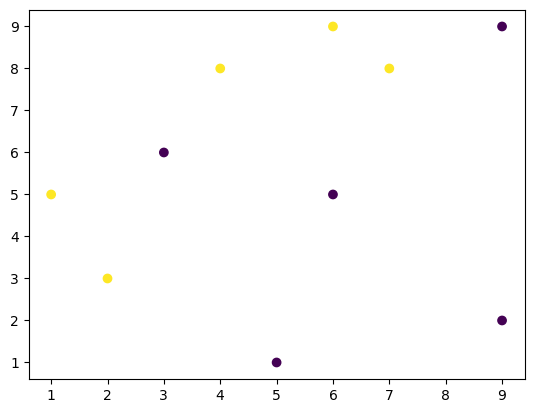

In [8]:
plt.scatter(df['X1'],df['X2'],c=df['label'])

In [9]:
dt1=DecisionTreeClassifier(max_depth=1)

In [10]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [11]:
X=df.iloc[:,0:2]

In [12]:
y=df['label']

In [13]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [14]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

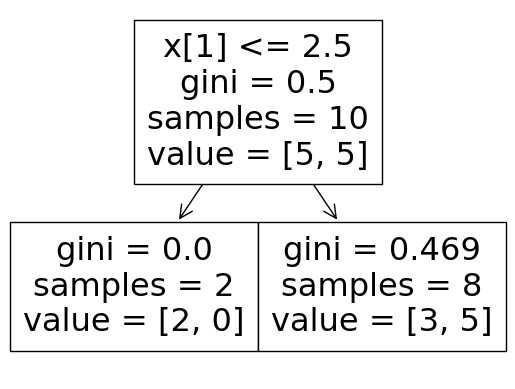

In [15]:
plot_tree(dt1)

In [16]:
from mlxtend.plotting import plot_decision_regions

G:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

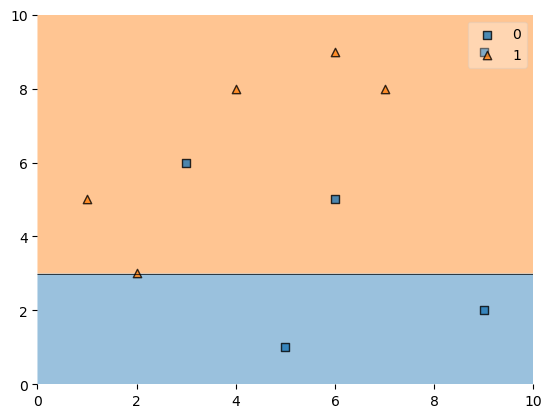

In [17]:
plot_decision_regions(np.array(X),np.array(y),dt1)

In [18]:
y_pred=dt1.predict(X)

In [19]:
df['pred']=y_pred

In [20]:
df

,X1,X2,label,weights,pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [21]:
def calc_error(df):
    e=0
    for i in df.values:
        if i[2]!=i[4]:
            e+=i[3]
    return e

In [22]:
def alpha(error):
    return 1/2*np.log((1-error)/error)

In [23]:
calc_error(df)

0.30000000000000004

In [98]:
A1=alpha(calc_error(df))

In [25]:
def weights(df,alpha):
    w=[]
    for i in df.values:
        if i[2]!=i[4]:
            w.append(i[3]*np.exp(alpha))
        else:
            w.append(i[3]*np.exp(-alpha))
    df['updated_weights']=w
    return df

In [26]:
data=weights(df,alpha(calc_error(df)))

In [27]:
data

,X1,X2,label,weights,pred,updated_weights
0,1,5,1,0.1,1,0.065465
1,2,3,1,0.1,1,0.065465
2,3,6,0,0.1,1,0.152753
3,4,8,1,0.1,1,0.065465
4,5,1,0,0.1,0,0.065465
5,6,9,1,0.1,1,0.065465
6,6,5,0,0.1,1,0.152753
7,7,8,1,0.1,1,0.065465
8,9,9,0,0.1,1,0.152753
9,9,2,0,0.1,0,0.065465


In [28]:
data.updated_weights.sum()

0.9165151389911682

In [29]:
data['normalised_weights']=data['updated_weights']/data['updated_weights'].sum()

In [30]:
data

,X1,X2,label,weights,pred,updated_weights,normalised_weights
0,1,5,1,0.1,1,0.065465,0.071429
1,2,3,1,0.1,1,0.065465,0.071429
2,3,6,0,0.1,1,0.152753,0.166667
3,4,8,1,0.1,1,0.065465,0.071429
4,5,1,0,0.1,0,0.065465,0.071429
5,6,9,1,0.1,1,0.065465,0.071429
6,6,5,0,0.1,1,0.152753,0.166667
7,7,8,1,0.1,1,0.065465,0.071429
8,9,9,0,0.1,1,0.152753,0.166667
9,9,2,0,0.1,0,0.065465,0.071429


In [31]:
data['normalised_weights'].sum()

0.9999999999999999

In [32]:
data['ub']=np.cumsum(df['normalised_weights'])

In [33]:
data

,X1,X2,label,weights,pred,updated_weights,normalised_weights,ub
0,1,5,1,0.1,1,0.065465,0.071429,0.071429
1,2,3,1,0.1,1,0.065465,0.071429,0.142857
2,3,6,0,0.1,1,0.152753,0.166667,0.309524
3,4,8,1,0.1,1,0.065465,0.071429,0.380952
4,5,1,0,0.1,0,0.065465,0.071429,0.452381
5,6,9,1,0.1,1,0.065465,0.071429,0.523810
6,6,5,0,0.1,1,0.152753,0.166667,0.690476
7,7,8,1,0.1,1,0.065465,0.071429,0.761905
8,9,9,0,0.1,1,0.152753,0.166667,0.928571
9,9,2,0,0.1,0,0.065465,0.071429,1.000000


In [34]:
data['lb']=data['ub']-data['normalised_weights']

In [35]:
data

,X1,X2,label,weights,pred,updated_weights,normalised_weights,ub,lb
0,1,5,1,0.1,1,0.065465,0.071429,0.071429,0.000000
1,2,3,1,0.1,1,0.065465,0.071429,0.142857,0.071429
2,3,6,0,0.1,1,0.152753,0.166667,0.309524,0.142857
3,4,8,1,0.1,1,0.065465,0.071429,0.380952,0.309524
4,5,1,0,0.1,0,0.065465,0.071429,0.452381,0.380952
5,6,9,1,0.1,1,0.065465,0.071429,0.523810,0.452381
6,6,5,0,0.1,1,0.152753,0.166667,0.690476,0.523810
7,7,8,1,0.1,1,0.065465,0.071429,0.761905,0.690476
8,9,9,0,0.1,1,0.152753,0.166667,0.928571,0.761905
9,9,2,0,0.1,0,0.065465,0.071429,1.000000,0.928571


In [36]:
data=data[['X1','X2','label','weights','pred','updated_weights','normalised_weights','lb','ub']]

In [37]:
data

,X1,X2,label,weights,pred,updated_weights,normalised_weights,lb,ub
0,1,5,1,0.1,1,0.065465,0.071429,0.000000,0.071429
1,2,3,1,0.1,1,0.065465,0.071429,0.071429,0.142857
2,3,6,0,0.1,1,0.152753,0.166667,0.142857,0.309524
3,4,8,1,0.1,1,0.065465,0.071429,0.309524,0.380952
4,5,1,0,0.1,0,0.065465,0.071429,0.380952,0.452381
5,6,9,1,0.1,1,0.065465,0.071429,0.452381,0.523810
6,6,5,0,0.1,1,0.152753,0.166667,0.523810,0.690476
7,7,8,1,0.1,1,0.065465,0.071429,0.690476,0.761905
8,9,9,0,0.1,1,0.152753,0.166667,0.761905,0.928571
9,9,2,0,0.1,0,0.065465,0.071429,0.928571,1.000000


In [44]:
def new_ds(df):
    ind=[]
    for i in range(df.shape[0]):
        a=np.random.random()
        for index,row in df.iterrows():
            if row['ub']>a and a>row['lb']:
                ind.append(index)
    return ind

In [46]:
i=new_ds(data)

In [49]:
data.iloc[i,:]

,X1,X2,label,weights,pred,updated_weights,normalised_weights,lb,ub
1,2,3,1,0.1,1,0.065465,0.071429,0.071429,0.142857
8,9,9,0,0.1,1,0.152753,0.166667,0.761905,0.928571
9,9,2,0,0.1,0,0.065465,0.071429,0.928571,1.000000
6,6,5,0,0.1,1,0.152753,0.166667,0.523810,0.690476
2,3,6,0,0.1,1,0.152753,0.166667,0.142857,0.309524
6,6,5,0,0.1,1,0.152753,0.166667,0.523810,0.690476
8,9,9,0,0.1,1,0.152753,0.166667,0.761905,0.928571
8,9,9,0,0.1,1,0.152753,0.166667,0.761905,0.928571
7,7,8,1,0.1,1,0.065465,0.071429,0.690476,0.761905
6,6,5,0,0.1,1,0.152753,0.166667,0.523810,0.690476


In [52]:
new_df=data.iloc[i,[0,1,2,3]]

In [53]:
new_df

,X1,X2,label,weights
1,2,3,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
6,6,5,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
7,7,8,1,0.1
6,6,5,0,0.1


In [56]:
dt2=DecisionTreeClassifier(max_depth=1)

In [57]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [58]:
y_pred=dt2.predict(X)

In [59]:
new_df['pred']=y_pred

In [60]:
new_df

,X1,X2,label,weights,pred
1,2,3,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0
6,6,5,0,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0
7,7,8,1,0.1,0
6,6,5,0,0.1,0


G:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

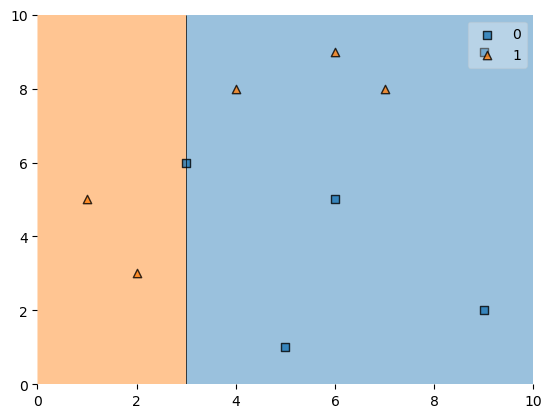

In [61]:
plot_decision_regions(np.array(X),np.array(y),dt2)

In [62]:
calc_error(new_df)

0.2

In [99]:
A2=alpha(calc_error(new_df))

In [64]:
data2=weights(new_df,alpha(calc_error(new_df)))

In [65]:
data2

,X1,X2,label,weights,pred,updated_weights
1,2,3,1,0.1,1,0.05
8,9,9,0,0.1,1,0.20
9,9,2,0,0.1,0,0.05
6,6,5,0,0.1,0,0.05
2,3,6,0,0.1,0,0.05
6,6,5,0,0.1,0,0.05
8,9,9,0,0.1,0,0.05
8,9,9,0,0.1,0,0.05
7,7,8,1,0.1,0,0.20
6,6,5,0,0.1,0,0.05


In [66]:
data2['updated_weights'].sum()

0.8

In [67]:
data2['normalised_weights']=data2['updated_weights']/data2['updated_weights'].sum()

In [68]:
data2

,X1,X2,label,weights,pred,updated_weights,normalised_weights
1,2,3,1,0.1,1,0.05,0.0625
8,9,9,0,0.1,1,0.20,0.2500
9,9,2,0,0.1,0,0.05,0.0625
6,6,5,0,0.1,0,0.05,0.0625
2,3,6,0,0.1,0,0.05,0.0625
6,6,5,0,0.1,0,0.05,0.0625
8,9,9,0,0.1,0,0.05,0.0625
8,9,9,0,0.1,0,0.05,0.0625
7,7,8,1,0.1,0,0.20,0.2500
6,6,5,0,0.1,0,0.05,0.0625


In [69]:
data2['normalised_weights'].sum()

1.0

In [70]:
data2['ub']=np.cumsum(data2['normalised_weights'])

In [71]:
data2

,X1,X2,label,weights,pred,updated_weights,normalised_weights,ub
1,2,3,1,0.1,1,0.05,0.0625,0.0625
8,9,9,0,0.1,1,0.20,0.2500,0.3125
9,9,2,0,0.1,0,0.05,0.0625,0.3750
6,6,5,0,0.1,0,0.05,0.0625,0.4375
2,3,6,0,0.1,0,0.05,0.0625,0.5000
6,6,5,0,0.1,0,0.05,0.0625,0.5625
8,9,9,0,0.1,0,0.05,0.0625,0.6250
8,9,9,0,0.1,0,0.05,0.0625,0.6875
7,7,8,1,0.1,0,0.20,0.2500,0.9375
6,6,5,0,0.1,0,0.05,0.0625,1.0000


In [72]:
data2['lb']=data2['ub']-data2['normalised_weights']

In [73]:
data2

,X1,X2,label,weights,pred,updated_weights,normalised_weights,ub,lb
1,2,3,1,0.1,1,0.05,0.0625,0.0625,0.0000
8,9,9,0,0.1,1,0.20,0.2500,0.3125,0.0625
9,9,2,0,0.1,0,0.05,0.0625,0.3750,0.3125
6,6,5,0,0.1,0,0.05,0.0625,0.4375,0.3750
2,3,6,0,0.1,0,0.05,0.0625,0.5000,0.4375
6,6,5,0,0.1,0,0.05,0.0625,0.5625,0.5000
8,9,9,0,0.1,0,0.05,0.0625,0.6250,0.5625
8,9,9,0,0.1,0,0.05,0.0625,0.6875,0.6250
7,7,8,1,0.1,0,0.20,0.2500,0.9375,0.6875
6,6,5,0,0.1,0,0.05,0.0625,1.0000,0.9375


In [74]:
index=[]
for i in range(data2.shape[0]):
    x=np.random.random()
    for ind,row in data2.iterrows():
        if x>row['lb'] and x<row['ub']:
            index.append(ind)

In [75]:
index

[8, 6, 8, 7, 7, 7, 8, 8, 7, 9]

In [76]:
new_data=df.iloc[index,:]

In [77]:
new_data

,X1,X2,label,weights,pred,updated_weights,normalised_weights,ub,lb
8,9,9,0,0.1,1,0.152753,0.166667,0.928571,0.761905
6,6,5,0,0.1,1,0.152753,0.166667,0.690476,0.523810
8,9,9,0,0.1,1,0.152753,0.166667,0.928571,0.761905
7,7,8,1,0.1,1,0.065465,0.071429,0.761905,0.690476
7,7,8,1,0.1,1,0.065465,0.071429,0.761905,0.690476
7,7,8,1,0.1,1,0.065465,0.071429,0.761905,0.690476
8,9,9,0,0.1,1,0.152753,0.166667,0.928571,0.761905
8,9,9,0,0.1,1,0.152753,0.166667,0.928571,0.761905
7,7,8,1,0.1,1,0.065465,0.071429,0.761905,0.690476
9,9,2,0,0.1,0,0.065465,0.071429,1.000000,0.928571


In [78]:
data3=new_data.iloc[:,[0,1,2,3]]

In [79]:
data3

,X1,X2,label,weights
8,9,9,0,0.1
6,6,5,0,0.1
8,9,9,0,0.1
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
8,9,9,0,0.1
8,9,9,0,0.1
7,7,8,1,0.1
9,9,2,0,0.1


In [80]:
dt3=DecisionTreeClassifier(max_depth=1)

In [81]:
dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [82]:
y_pred_dt3=dt3.predict(X)

In [83]:
data3['pred']=y_pred_dt3

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15380\3857099863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['pred']=y_pred_dt3


In [84]:
data3

,X1,X2,label,weights,pred
8,9,9,0,0.1,1
6,6,5,0,0.1,1
8,9,9,0,0.1,1
7,7,8,1,0.1,1
7,7,8,1,0.1,0
7,7,8,1,0.1,1
8,9,9,0,0.1,1
8,9,9,0,0.1,1
7,7,8,1,0.1,1
9,9,2,0,0.1,0


G:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

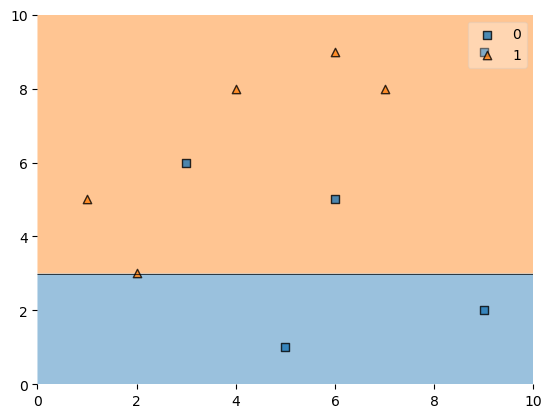

In [85]:
plot_decision_regions(np.array(X),np.array(y),dt3)

In [86]:
calc_error(data3)

0.6

In [100]:
A3=alpha(0.6)

In [88]:
d=weights(data3,alpha(calc_error(data3)))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15380\1048989996.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['updated_weights']=w


In [89]:
d

,X1,X2,label,weights,pred,updated_weights
8,9,9,0,0.1,1,0.081650
6,6,5,0,0.1,1,0.081650
8,9,9,0,0.1,1,0.081650
7,7,8,1,0.1,1,0.122474
7,7,8,1,0.1,0,0.081650
7,7,8,1,0.1,1,0.122474
8,9,9,0,0.1,1,0.081650
8,9,9,0,0.1,1,0.081650
7,7,8,1,0.1,1,0.122474
9,9,2,0,0.1,0,0.122474


In [90]:
d['updated_weights'].sum()

0.9797958971132712

In [91]:
d['normalised_weights']=d['updated_weights']/d['updated_weights'].sum()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15380\3726652833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['normalised_weights']=d['updated_weights']/d['updated_weights'].sum()


In [92]:
d

,X1,X2,label,weights,pred,updated_weights,normalised_weights
8,9,9,0,0.1,1,0.081650,0.083333
6,6,5,0,0.1,1,0.081650,0.083333
8,9,9,0,0.1,1,0.081650,0.083333
7,7,8,1,0.1,1,0.122474,0.125000
7,7,8,1,0.1,0,0.081650,0.083333
7,7,8,1,0.1,1,0.122474,0.125000
8,9,9,0,0.1,1,0.081650,0.083333
8,9,9,0,0.1,1,0.081650,0.083333
7,7,8,1,0.1,1,0.122474,0.125000
9,9,2,0,0.1,0,0.122474,0.125000


In [93]:
d['ub']=np.cumsum(d['normalised_weights'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15380\1303840558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['ub']=np.cumsum(d['normalised_weights'])


In [94]:
d['lb']=d['ub']-d['normalised_weights']

In [95]:
d

,X1,X2,label,weights,pred,updated_weights,normalised_weights,ub,lb
8,9,9,0,0.1,1,0.081650,0.083333,0.083333,0.000000
6,6,5,0,0.1,1,0.081650,0.083333,0.166667,0.083333
8,9,9,0,0.1,1,0.081650,0.083333,0.250000,0.166667
7,7,8,1,0.1,1,0.122474,0.125000,0.375000,0.250000
7,7,8,1,0.1,0,0.081650,0.083333,0.458333,0.375000
7,7,8,1,0.1,1,0.122474,0.125000,0.583333,0.458333
8,9,9,0,0.1,1,0.081650,0.083333,0.666667,0.583333
8,9,9,0,0.1,1,0.081650,0.083333,0.750000,0.666667
7,7,8,1,0.1,1,0.122474,0.125000,0.875000,0.750000
9,9,2,0,0.1,0,0.122474,0.125000,1.000000,0.875000


In [96]:
indexes=new_ds(d)

In [97]:
indexes

[8, 8, 8, 8, 7, 8, 7, 7, 9, 7]

In [101]:
query=np.array([1,5]).reshape(1,2)

In [102]:
dt1.predict(query)

G:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [103]:
dt2.predict(query)

G:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [105]:
dt3.predict(query)

G:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [106]:
classification=A1*1+A2*1+A3*1

In [107]:
ada=np.sign(classification)

In [108]:
ada

1.0